### Predicting California House Prices (1990s)

This notebook explores the California housing dataset from the 1990s.  
We’ll format the data, load it into a DataFrame, and prepare it for modeling.

## Importing Libraries
We import the necessary Python libraries for data handling and model building.

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing


## Set Display Options
Format output to show more columns and limit float precision for readability.


In [8]:
pd.set_option("display.max_columns", 9)
pd.set_option("display.precision", 4)
pd.set_option("display.width", None)
sns.set(font_scale=2)
sns.set_style("white")

## Load and Preview Dataset



In [9]:
california = fetch_california_housing()
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df["MedHouseVal"] = california.target
california_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


## Data Summary & Structure


In [10]:
california_df.describe()
# california_df.info()
# california_df.isnull().sum()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


In [11]:
sample_df = california_df.sample(frac=.1, random_state = 17)

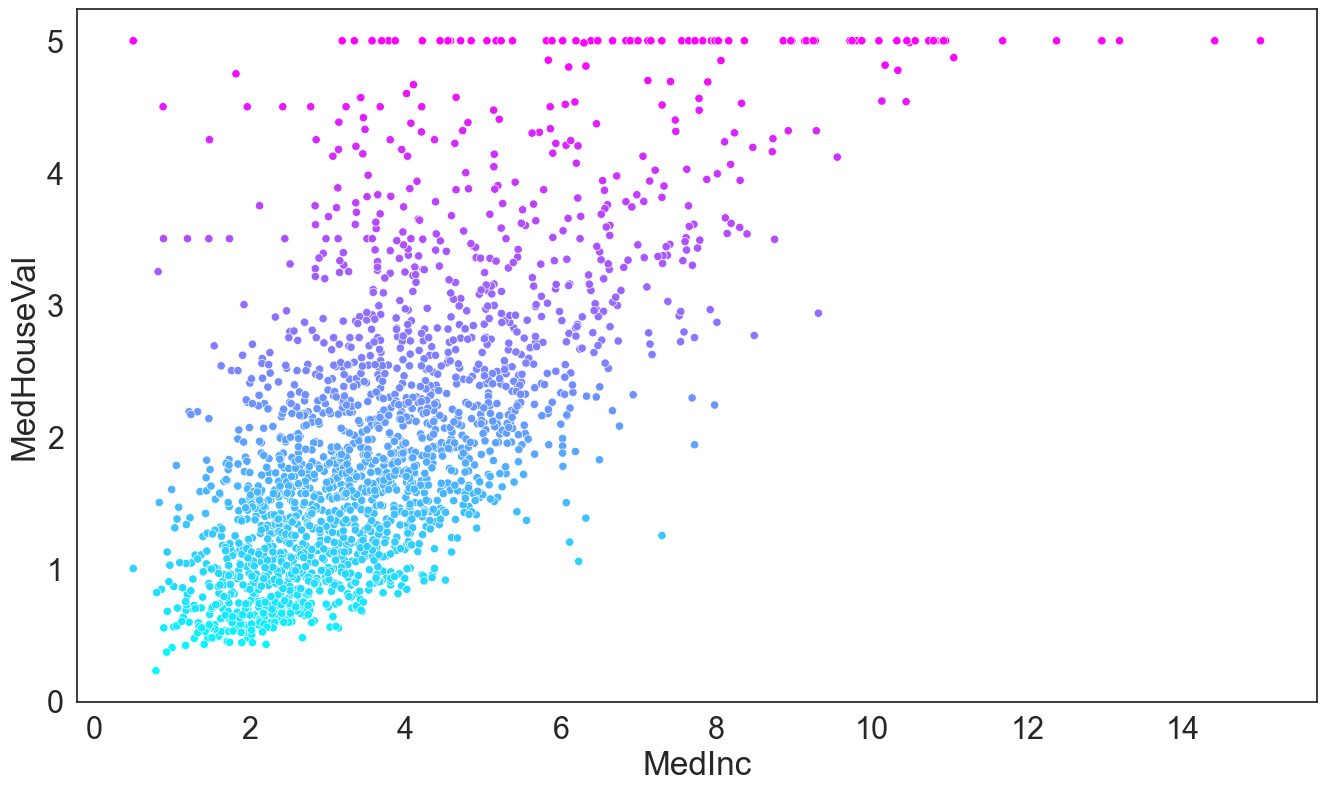

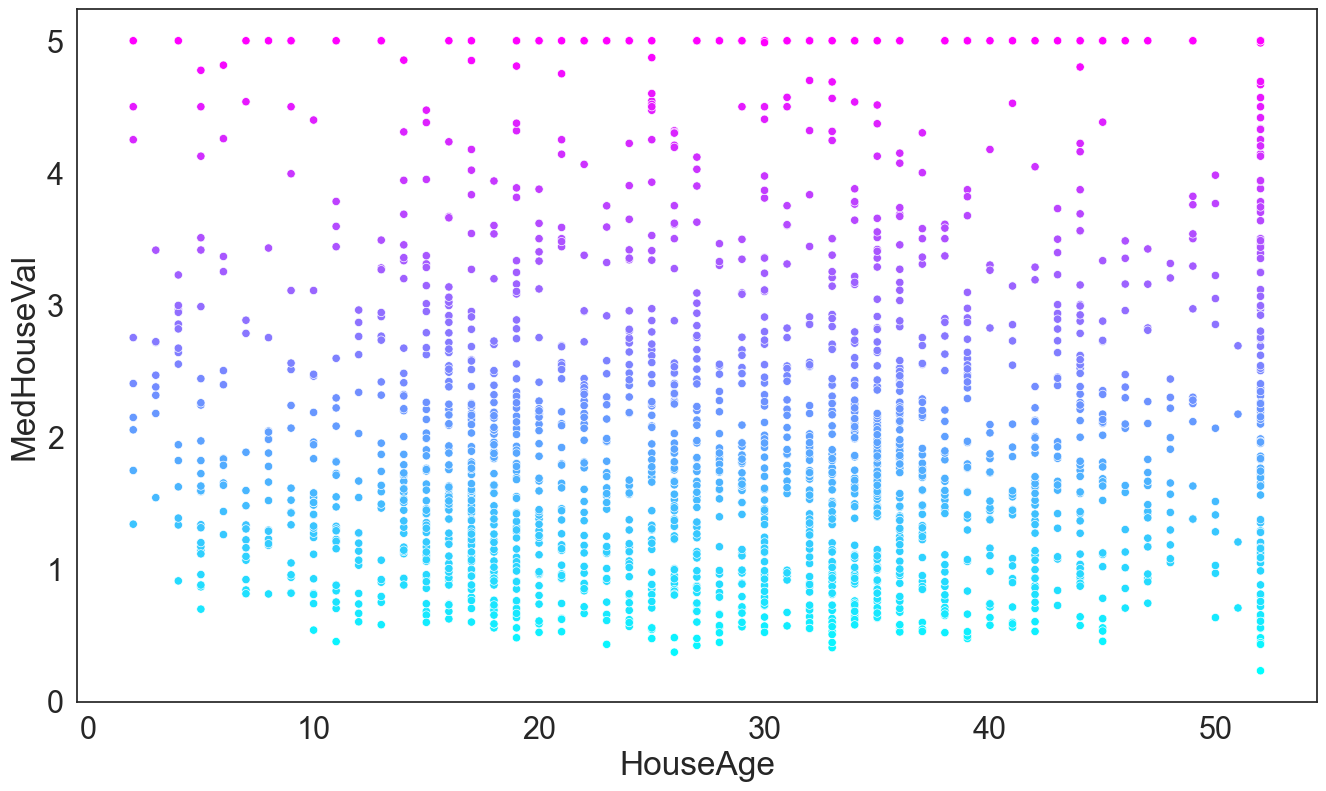

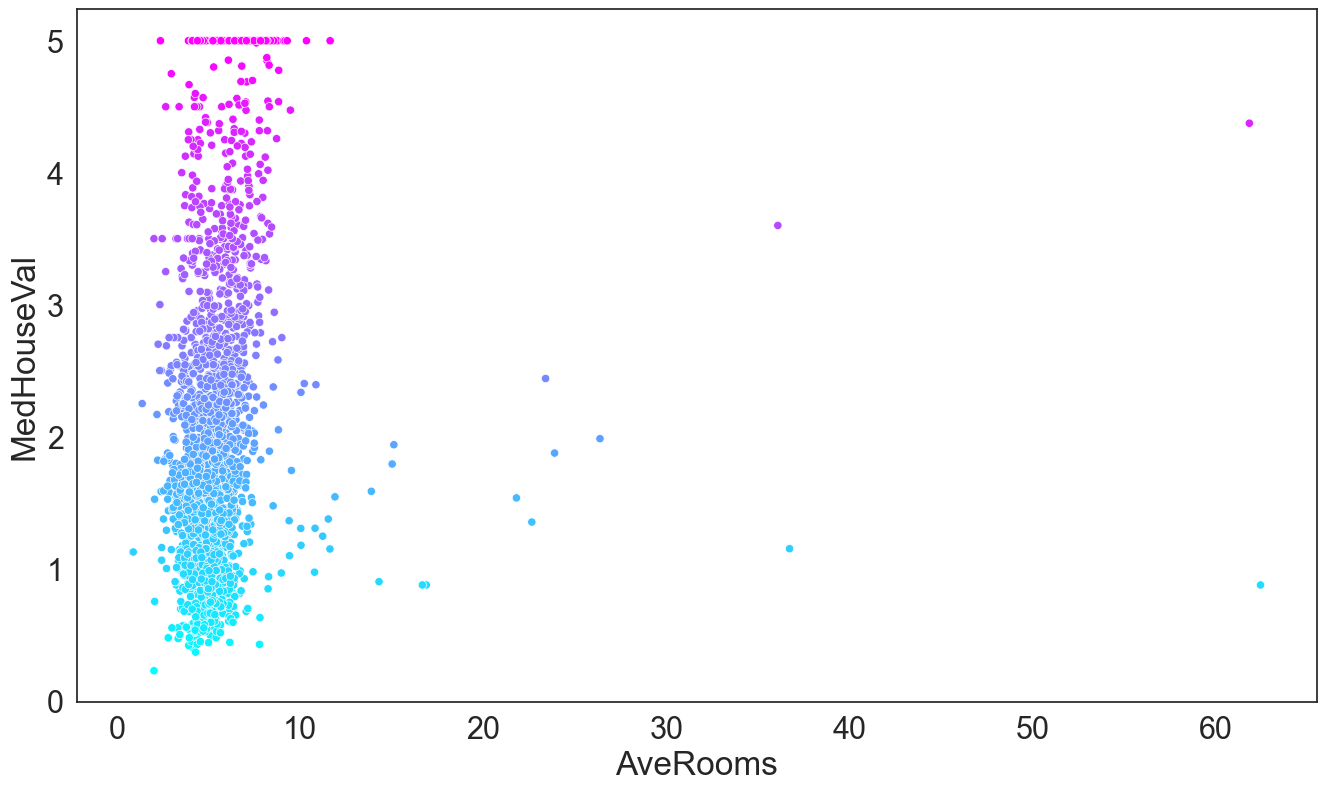

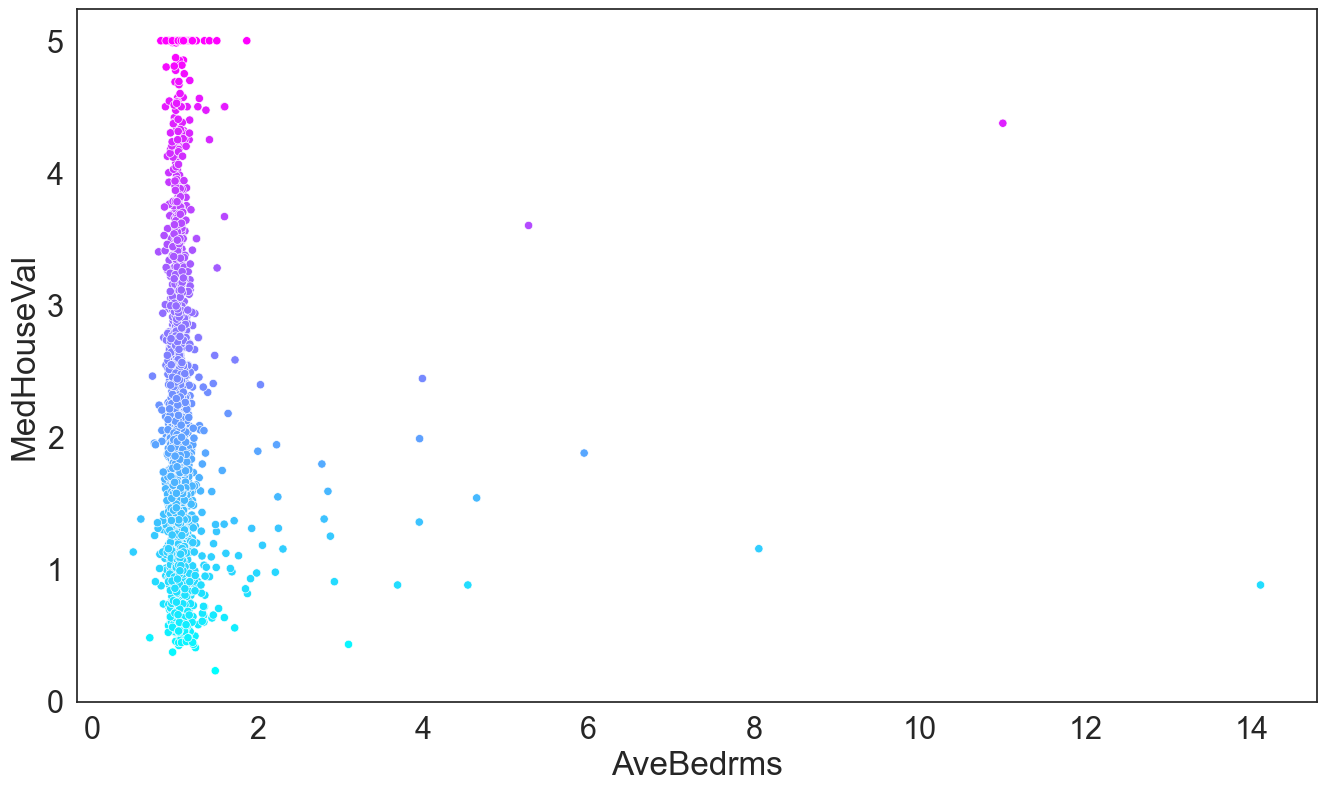

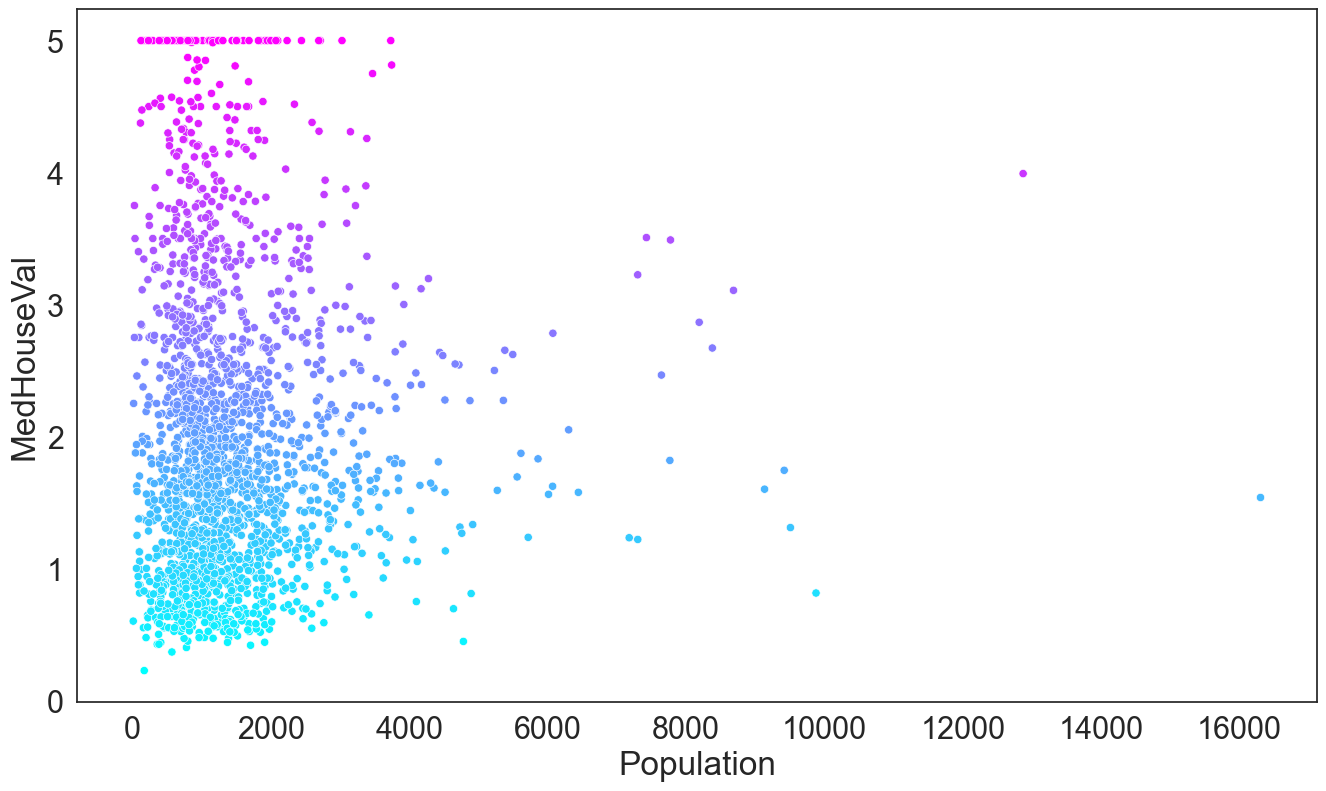

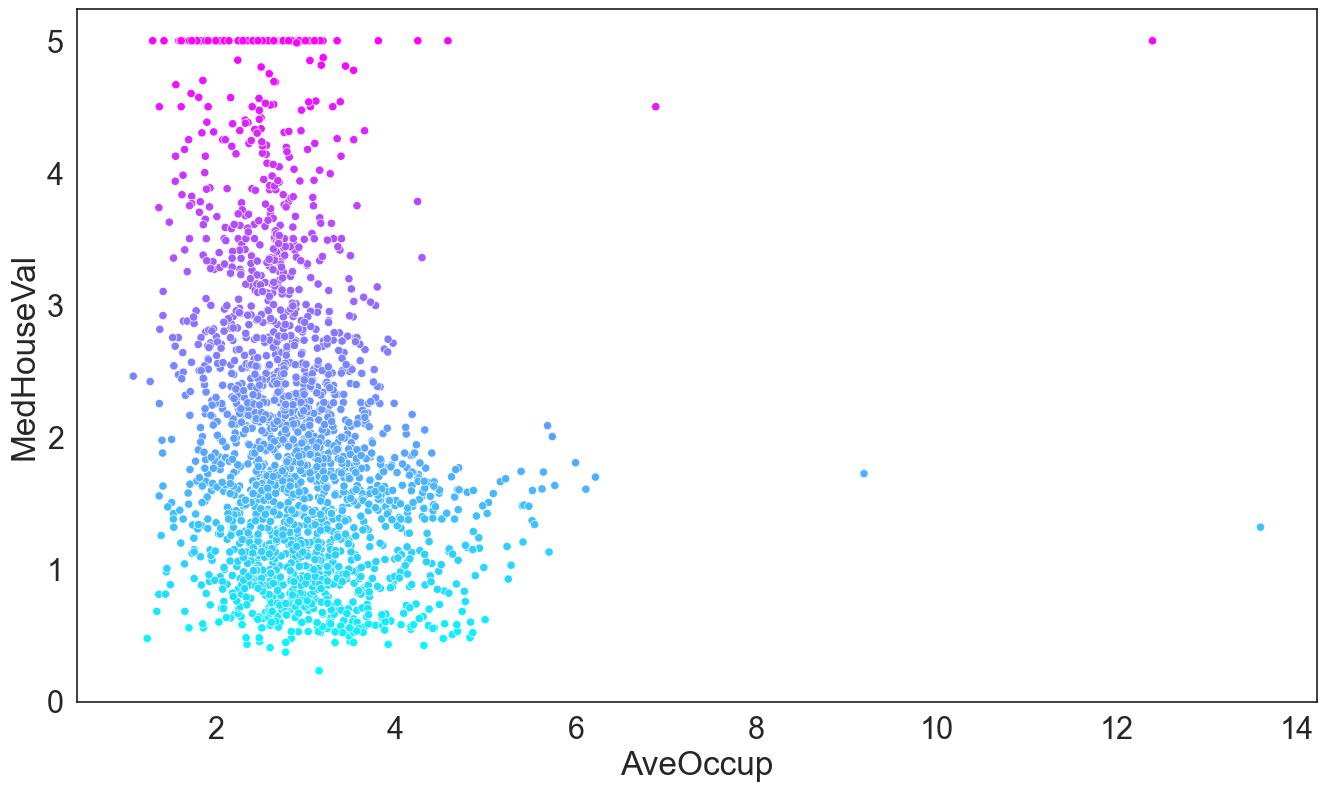

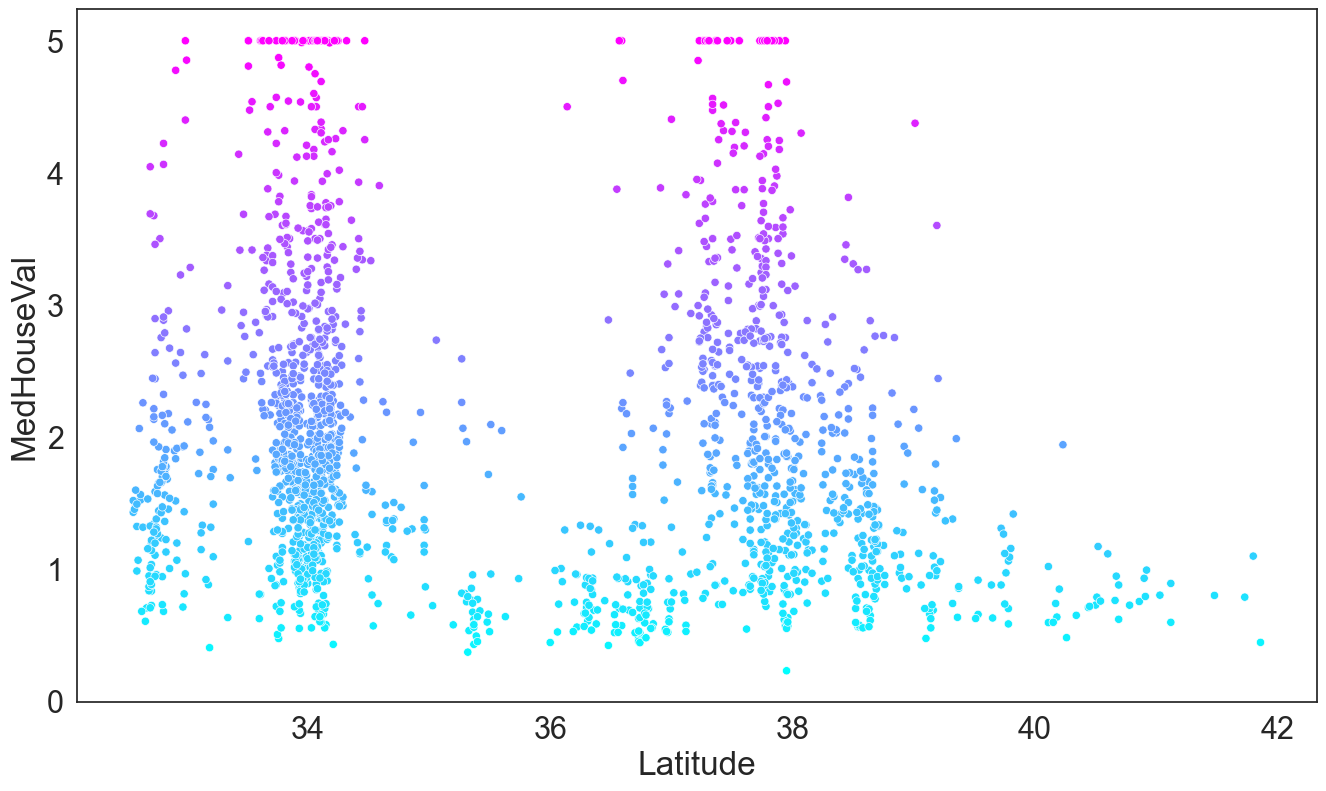

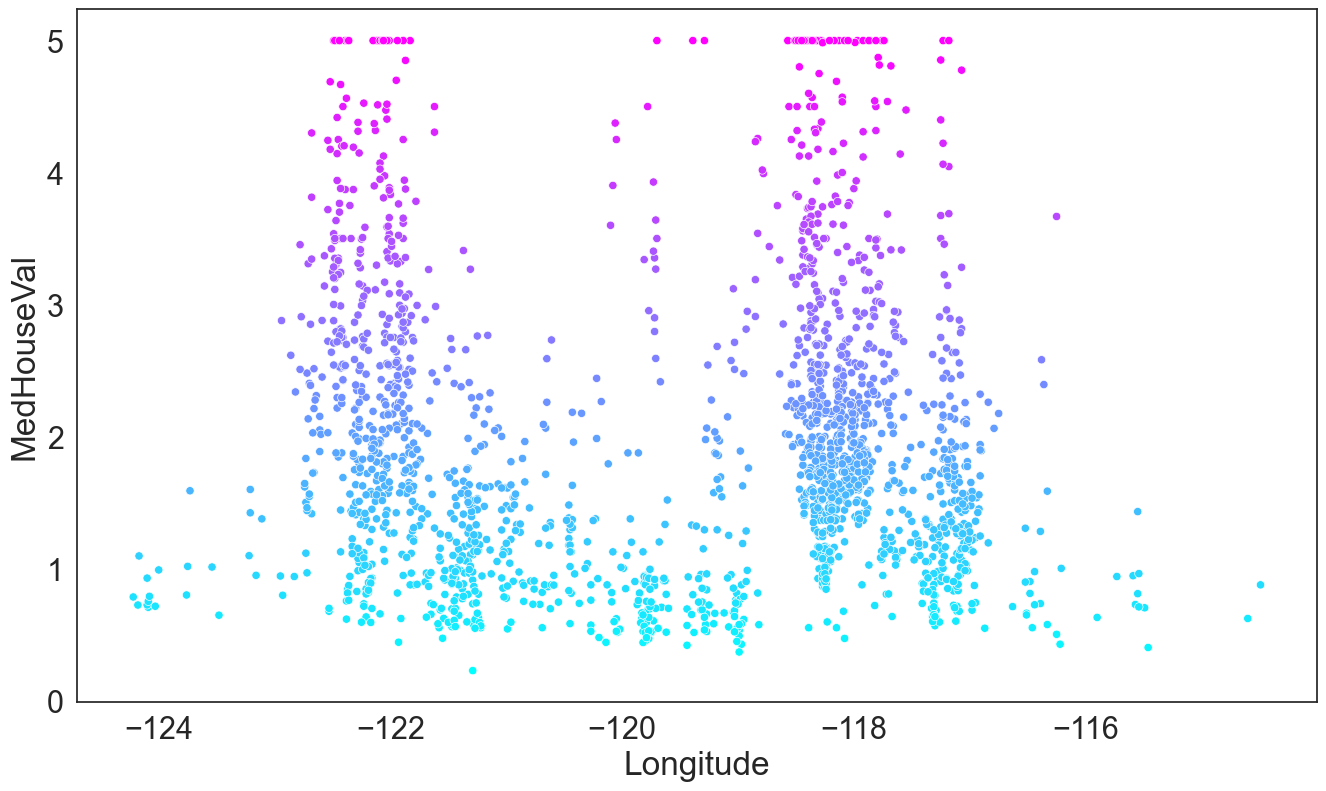

In [12]:
for feature in california.feature_names:
    plt.figure(figsize=(16,9))
    sns.scatterplot(data =sample_df,x=feature,y="MedHouseVal",hue="MedHouseVal",palette="cool",legend = False)